# Tutorial 9b - Thorlabs Catalogue

### August 2024

This tutorial shows how to retrieve optical components from the [Thorlabs](https://www.thorlabs.com/) lens catalogue. Building on the previous tutorial, we will show:

- How to retrieve a lens model directly from the Thorlabs website
- How to modify the lens properties after retrieval

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from optiland import analysis
from optiland.fileio import load_zemax_file

File retrieval

As mentioned in the previous tutorial, the `load_zemax_file` function can accept either a Zemax (.zmx) file directly or a URL link to the file. Here, we will use the a [Thorlabs Matched Achromatic Pair Lens](https://www.thorlabs.com/thorproduct.cfm?partnumber=MAP051950-A) and we will pass the URL directly to ZemaxFileReader. Optiland will download the file prior to reading the .zmx file.

In [2]:
# link to the .zmx file on Thorlabs website
url = "https://www.thorlabs.com/_sd.cfm?fileName=20565-S03.zmx&partNumber=MAP051950-A"

lens = load_zemax_file(url)

We then draw the lens.

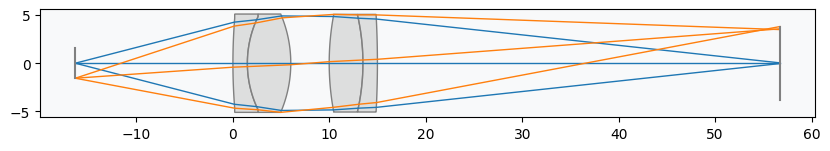

In [3]:
lens.draw()

Let's print an overview of the lens data:

In [4]:
lens.info()

+----+---------------+----------+-------------+------------+---------+-----------------+
|    | Type          |   Radius |   Thickness | Material   |   Conic |   Semi-aperture |
|----+---------------+----------+-------------+------------+---------+-----------------|
|  0 | Planar        |   inf    |    16.3412  | Air        |       0 |        0.413735 |
|  1 | Standard      |    59.26 |     1.5     | N-SF6HT    |       0 |        4.633    |
|  2 | Standard      |    11.04 |     4.5     | N-BAF10    |       0 |        4.73714  |
|  3 | Standard      |   -12.94 |     2       | Air        |       0 |        5.23109  |
|  4 | Stop - Planar |   inf    |     1.98331 | Air        |       0 |        5.05599  |
|  5 | Standard      |    27.36 |     3.5     | N-BK7      |       0 |        5.19763  |
|  6 | Standard      |   -22.54 |     1.5     | SF2        |       0 |        5.13588  |
|  7 | Standard      |   -91.83 |    41.7305  | Air        |       0 |        5.13866  |
|  8 | Planar        

Lens Analysis

Let's plot the nominal spot diagram:

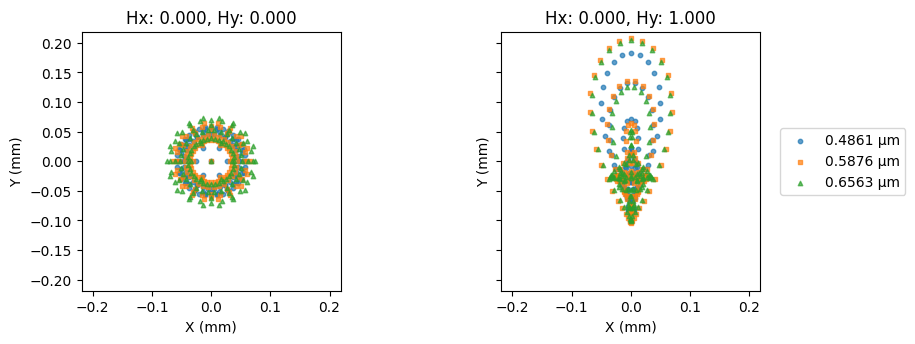

In [5]:
spot = analysis.SpotDiagram(lens)
spot.view()

The lens is designed for finite conjugate applications. As an exercise, let's monitor the RMS spot size as a function of the object position. As we shift the object plane, we will reposition the image plane to the paraxial image location. We will use the on-axis field point (index=0) and the central wavelength (index=1).

In [6]:
# we will shift the object plane by ±3.0 mm from the nominal location
dz = np.linspace(-3.0, 3.0, 64)

# thickness between the object surface and the first lens surface
thickness = dz + 16.3412  # nominal location = 16.3412 mm

# set the wavelength and field indices
wavelength_idx = 1
field_idx = 0

# initialize variables
rms_spot_radius = []

for z in thickness:
    # change thickness on the first surface
    lens.set_thickness(value=z, surface_number=0)

    # move image plane to maintain focus
    lens.image_solve()

    # generate spot diagram data
    spot = analysis.SpotDiagram(lens)

    # calculate RMS spot radius
    rms_spot_radius.append(spot.rms_spot_radius()[field_idx][wavelength_idx])

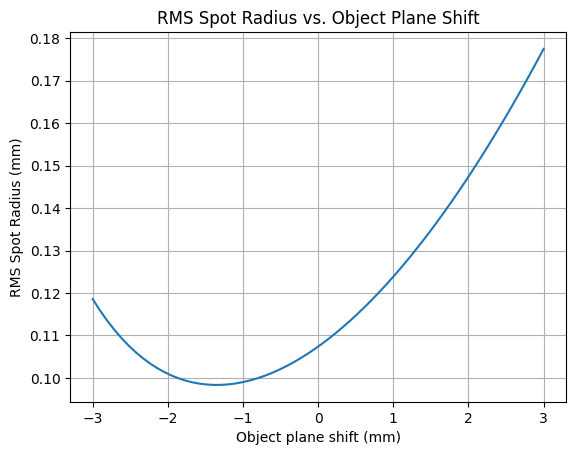

In [7]:
plt.plot(dz, rms_spot_radius)
plt.xlabel("Object plane shift (mm)")
plt.ylabel("RMS Spot Radius (mm)")
plt.title("RMS Spot Radius vs. Object Plane Shift")
plt.grid()
plt.show()

Conclusions

- This tutorial showed how to retrieve and analyze a Thorlabs catalogue lens.
- We modified the lens properties and assessed the RMS spot size of the on-axis field as a function of the object plane shift. We compensated for the object shift by repositioning the image plane to the paraxial image location.